# Exercici 2.1. Visualització de dades sobre dataset mpg.

Importa seaborn com a sns, matplotlib.pyplot com a plt i aplica %matplotlib inline

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

Importa el dataset de seaborn 'mpg' emprant sns.load_dataset('mpg'). Anomena'l mpg_df

In [3]:
mpg_df = sns.load_dataset('mpg')
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Genera un pairplot per tal d'explorar preliminarment les dades.

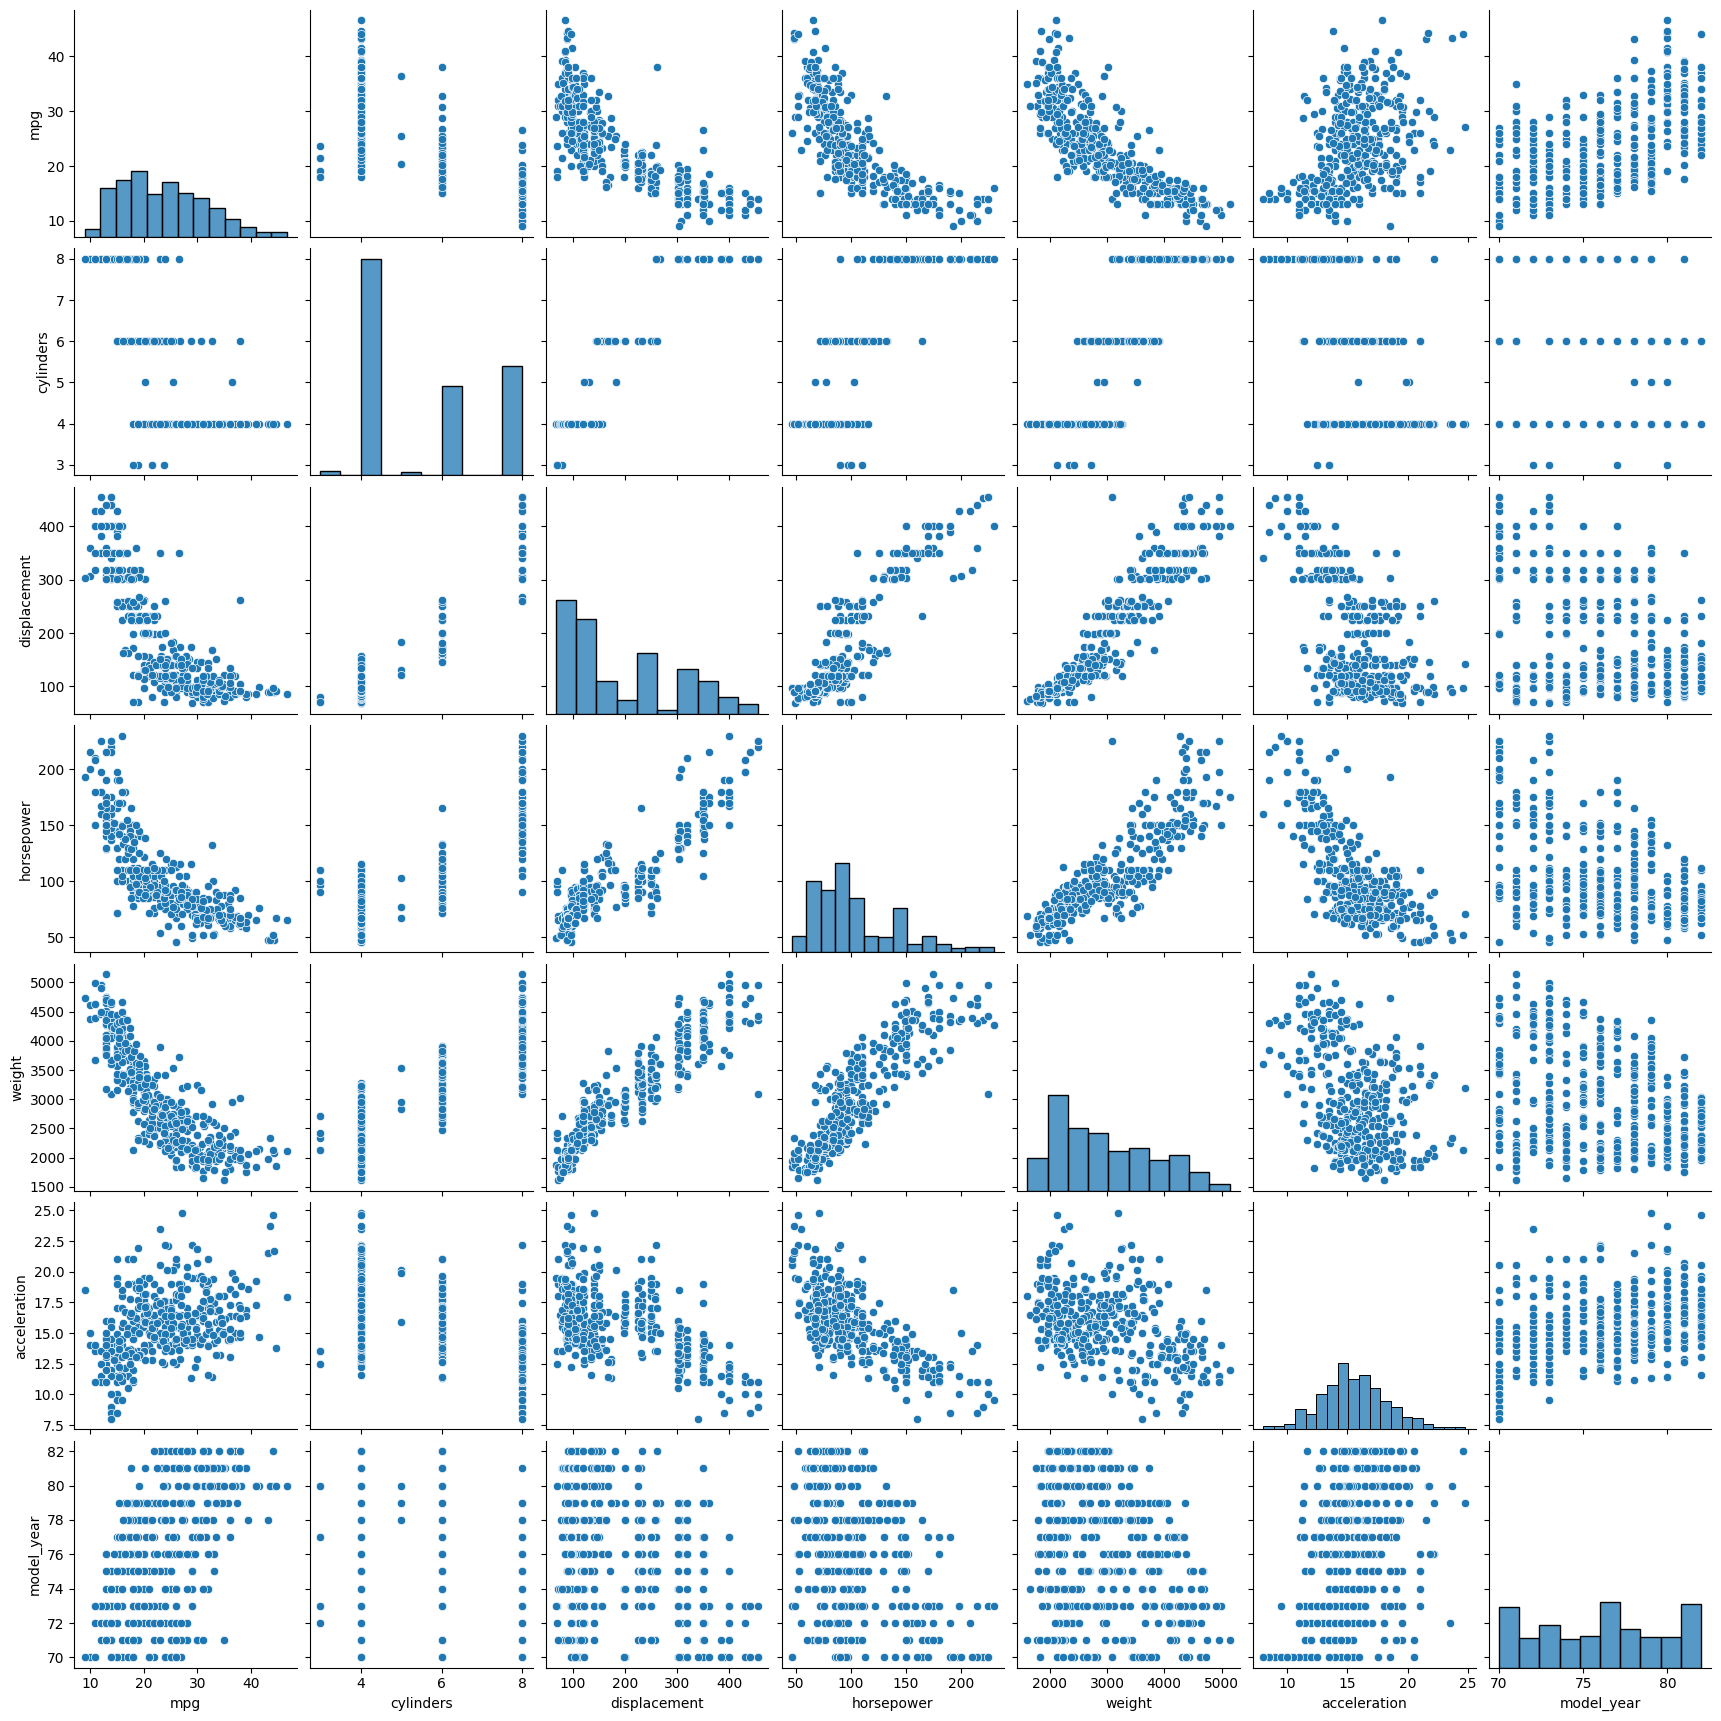

In [4]:
g = sns.pairplot(mpg_df)
plt.show()

Genera el mateix pairplot, però aplica com a 'hue' l'origen

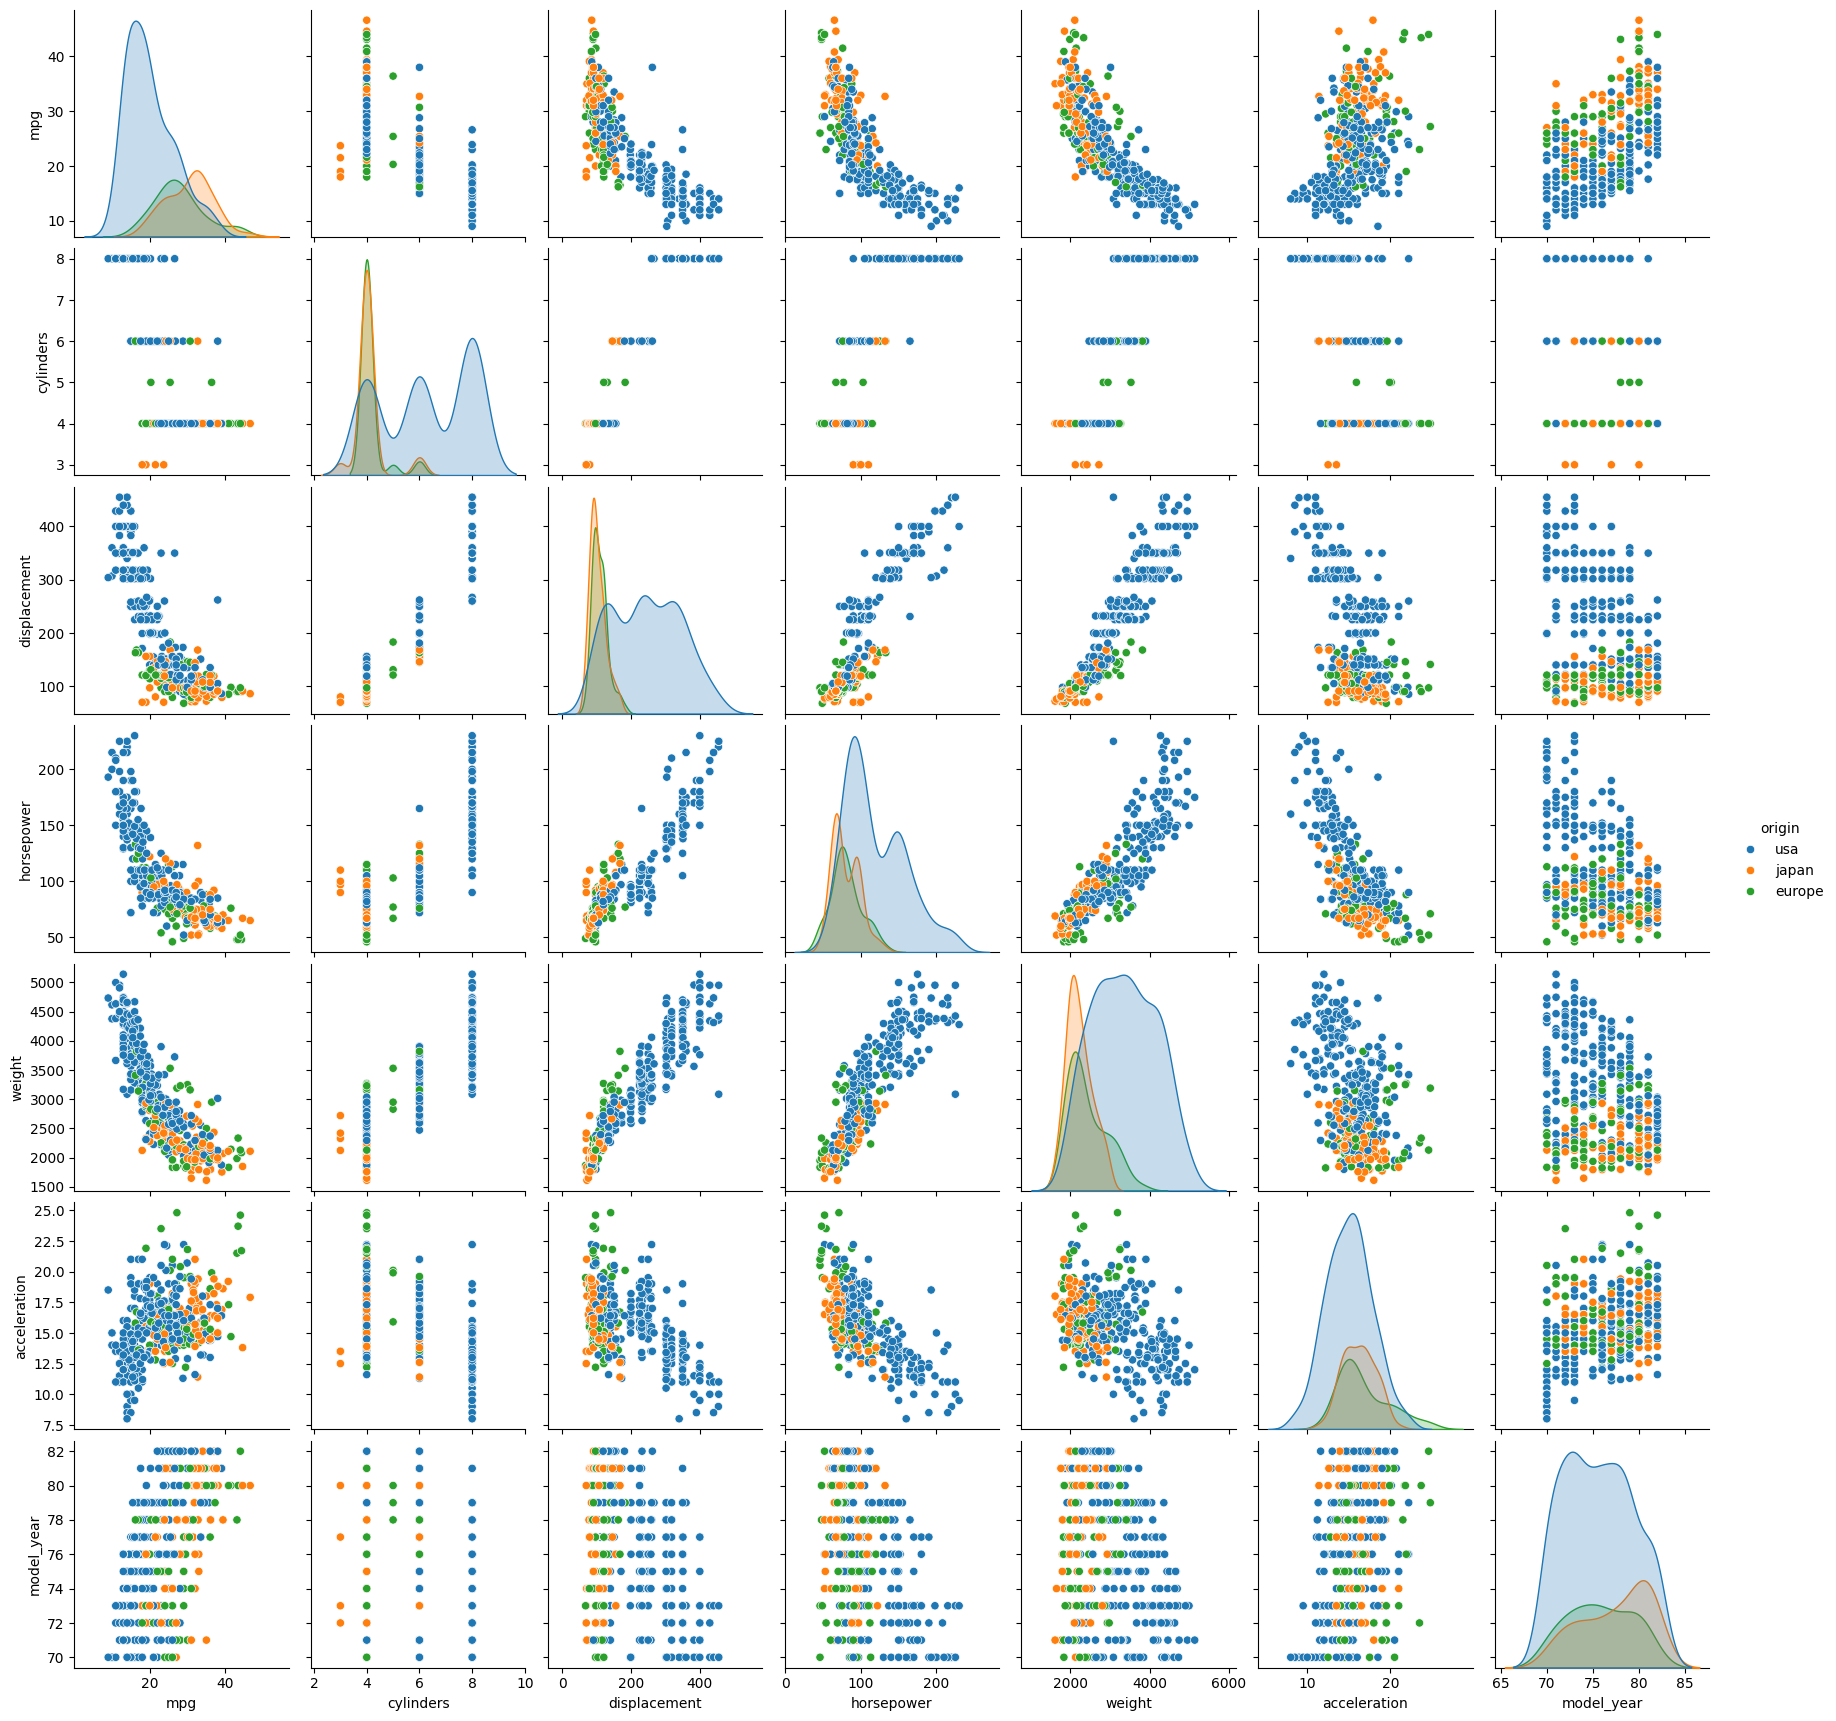

In [5]:
g = sns.pairplot(mpg_df, hue='origin')
plt.show()

Mostra un displot sobre l'atribut model_year

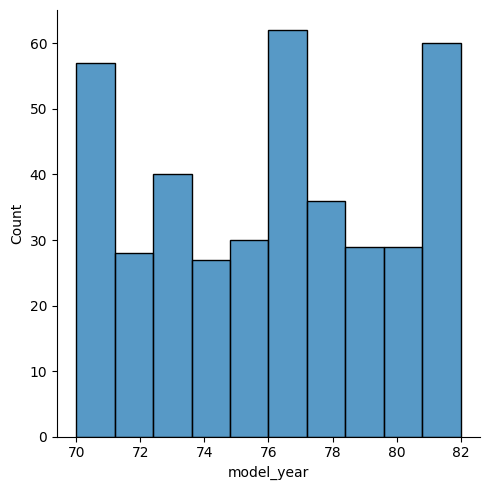

In [6]:
sns.displot(mpg_df['model_year'])
plt.show()

Mostra un displot sobre l'atribut mpg amb 25 bins i kde (kernel density estimator) a True

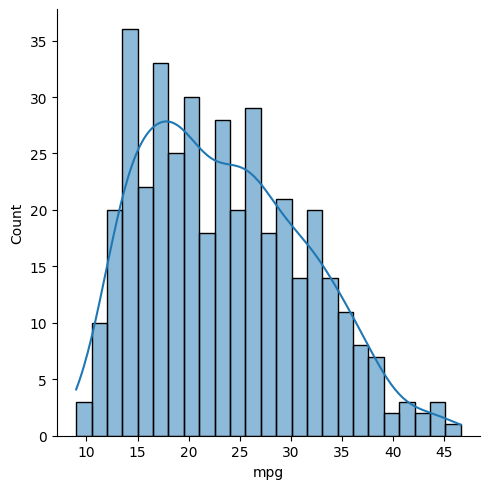

In [7]:
sns.displot(mpg_df['mpg'], kde=True, bins=25)
plt.show()

Mostra un jointplot emprant com a x mpg i y horsepower. El tipus serà kde amb 'origin' com a hue

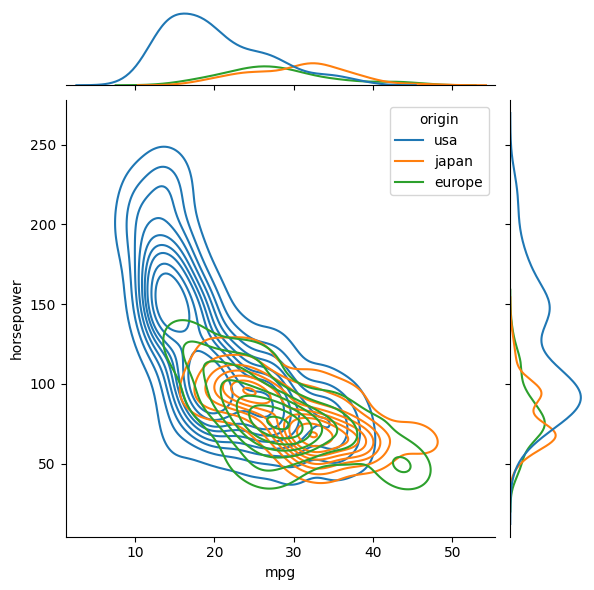

In [8]:
sns.jointplot(x='mpg', y='horsepower', data=mpg_df, hue='origin', kind='kde')
plt.show()

Canvia la mida de la figura a (12,7). Posa el titol 'Pes segons cilindres'.
Mostra un boxplot emprant el nombre de cilindres a l'eix x i el pes a l'y.

C:\Users\alanr\AppData\Local\Temp\ipykernel_11500\95420923.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cylinders', y='weight', data=mpg_df, palette='Set2')


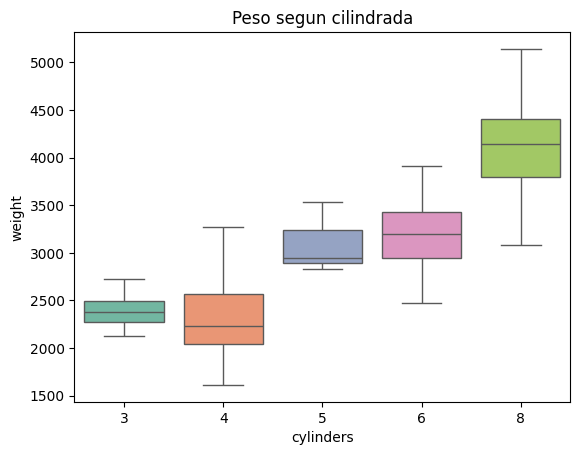

<Figure size 1200x700 with 0 Axes>

In [11]:
sns.boxplot(x='cylinders', y='weight', data=mpg_df, palette='Set2')
plt.title('Peso segun cilindrada')
plt.figure(figsize=(12, 7))
plt.show()

Crea un violinplot amb model_year i mpg. Torna a canviar el figsize a (12,7)

C:\Users\alanr\AppData\Local\Temp\ipykernel_11500\714361011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='model_year', y='mpg', data=mpg_df, palette='Set3')


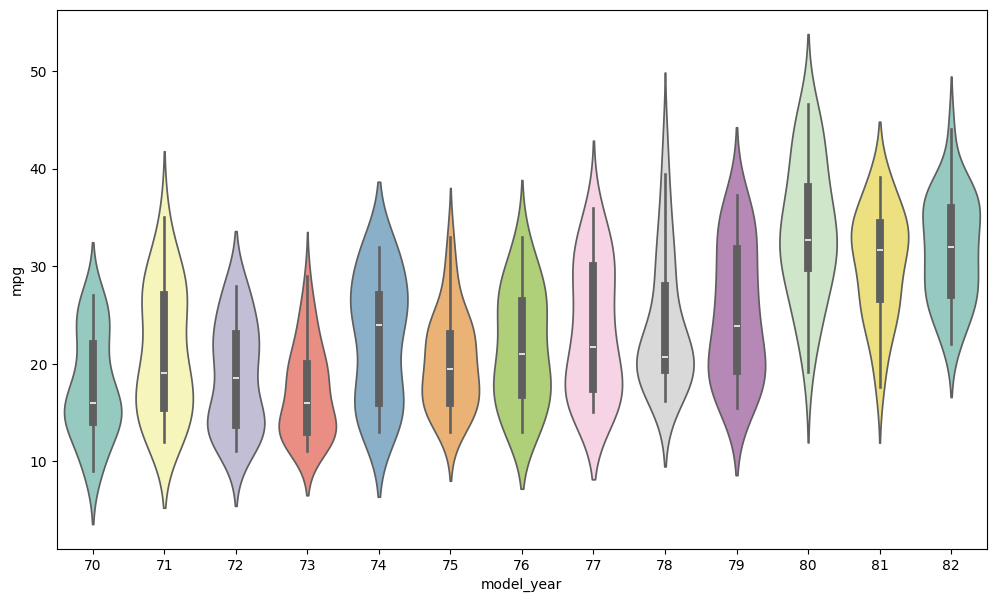

In [18]:
plt.figure(figsize=(12, 7))
sns.violinplot(x='model_year', y='mpg', data=mpg_df, palette='Set3')
plt.show()

Emprant la functio corr(), visualitza els coeficients de correlació de mpg_df

In [21]:
corr_matrix = mpg_df.select_dtypes(include=['number']).corr()
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


Mostra un heatmap sobre la correlació entre columnes de mpg_df. Canvia el cmap a coolwarm i activa les anotacions.

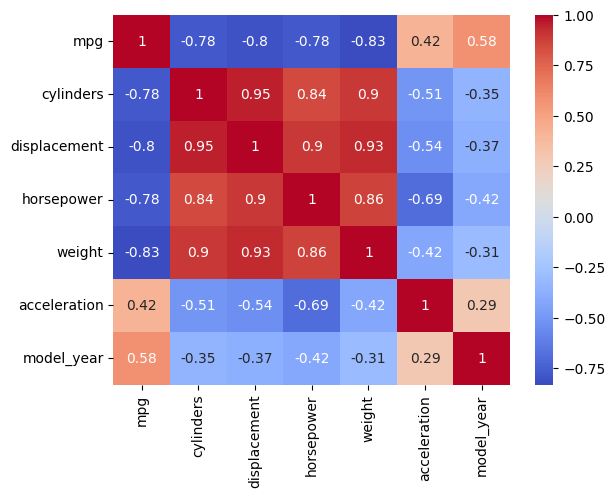

In [24]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

A continuació simplificarem les dades a sols els atributs mpg, model_year i horsepower. Degut a que els atributs mpg i horsepower són escalars, els arrodonirem de la següent forma:


-mpg de 5 en 5. O sigui que 18 es convertiran en 20 i 31 en 30 per exemple. 

-horsepower de 10 en 10. O sigui que 68 es convertiran en 70 i 151 en 150.

Executa la cel·la per tal de poder fer els darrers exercicis

In [25]:
import numpy as np
import pandas as pd
mpg_df_simplified = mpg_df[['mpg','model_year','horsepower']].copy()
mpg_df_simplified['mpg'] = mpg_df_simplified['mpg'].apply(lambda mpg: np.round(mpg/5)*5)
mpg_df_simplified['horsepower'] = mpg_df_simplified['horsepower'].apply(lambda hp: np.round(hp/10)*10)
mpg_df_simplified

,mpg,model_year,horsepower
0,20.0,70,130.0
1,15.0,70,160.0
2,20.0,70,150.0
3,15.0,70,150.0
4,15.0,70,140.0
...,...,...,...
393,25.0,82,90.0
394,45.0,82,50.0
395,30.0,82,80.0
396,30.0,82,80.0


Crea una taula pivotada anomenada mpg_pivot. Empra com a index 'model_year', columna 'horsepower' i valor 'mpg'

In [26]:
mpg_pivot = mpg_df_simplified.pivot_table(index='model_year', columns='horsepower', values='mpg')
mpg_pivot

horsepower,50.0,60.0,70.0,80.0,90.0,100.0,110.0,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0
model_year,,,,,,,,,,,,,,,,,,,
70,25.0,NaN,NaN,20.000000,23.750000,22.500000,25.000000,NaN,20.0,15.000000,16.666667,15.000000,15.0,NaN,12.5,12.5,10.0,14.0,NaN
71,NaN,27.50,27.500000,30.000000,25.000000,19.166667,20.000000,NaN,NaN,NaN,15.000000,15.000000,15.0,13.333333,NaN,NaN,NaN,NaN,NaN
72,25.0,NaN,25.000000,25.000000,22.500000,23.333333,20.000000,NaN,15.0,15.000000,15.000000,13.333333,NaN,15.000000,15.0,NaN,10.0,NaN,NaN
73,27.5,NaN,20.000000,22.500000,20.833333,20.000000,21.666667,20.000000,NaN,15.000000,14.166667,15.000000,12.5,12.500000,NaN,10.0,NaN,12.5,15.0
74,30.0,30.00,28.333333,26.428571,25.000000,19.166667,15.000000,NaN,NaN,15.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,35.0,NaN,21.250000,26.666667,22.500000,21.000000,17.500000,25.000000,15.0,15.000000,15.000000,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
76,32.5,25.00,28.750000,25.000000,23.750000,20.000000,20.000000,15.000000,15.0,17.500000,15.000000,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
77,NaN,32.50,31.666667,30.000000,25.000000,21.000000,18.750000,NaN,15.0,17.500000,15.000000,NaN,15.0,15.000000,15.0,NaN,NaN,NaN,NaN
78,40.0,35.00,33.000000,23.750000,22.500000,22.500000,20.000000,18.333333,15.0,20.000000,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mostra un heatmap sobre la taula pivotada emprant el cmap 'viridis'

<Axes: xlabel='horsepower', ylabel='model_year'>

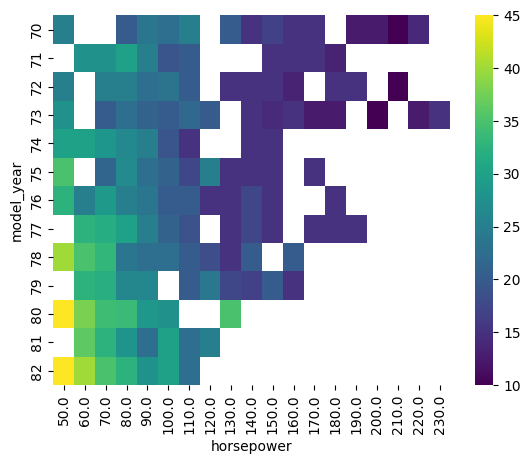

In [28]:
sns.heatmap(mpg_pivot, cmap='viridis', annot=False)